<center>

$\Huge \textbf{Universidad Tecmilenio}$  
<p align="center">
  <img src="tecmilenio_logo.png" alt="Tecmilenio" width="200"/>
</p>

<hr style="height:3px; background-color:#0B6E4F; border:none;"/>


$\LARGE \textbf{Evidencia de Aprendizaje}$  

$\Large \textit{Introducción a la Ciencia de Datos y Machine Learning}$  

$\large \textsf{con Datos Financieros}$  

\begin{array}{rl}
\textbf{Docente:} & Eric Geraldo Torres Flores \\[6pt]
\textbf{Alumno:} & Luis Ricardo Rivera Goitia \\[6pt]
\textbf{Fecha de entrega:} & 30/12/2025
\end{array}

</center>

***
**Tecmilenio no guarda relación alguna con las marcas mencionadas como ejemplo. Las marcas son propiedad de sus titulares conforme a la legislación aplicable, se utilizan con fines académicos y didácticos, por lo que no existen fines de lucro, relación publicitaria o de patrocinio.

---

**Instrucciones iniciales**:

- Dale un nombre descriptivo al archivo con la siguiente nomenclatura ML_Finanzas_EA_ApellidoPAterno_ApellidoMaterno_PrimerNombre.ipynb, por ejemplo, ML_Finanzas_EA_Lopez_Rosas_Laura.ipynb

- Escribe tu nombre y el de tu docente en el título dando doble clic a la celda y colocando los datos correctos.

- Documenta tu trabajo, añade comentarios a tu código usando # para explicar lo que haces. Utiliza celdas de texto (Markdown) para responder a las preguntas y documentar tus hallazgos.

- Ejecuta celdas: Puedes ejecutar cada bloque de código (celda) haciendo clic en el botón de "Play" o presionando Shift + Enter.

#Evidencia de Aprendizaje: Modelos Avanzados de Clasificación en Retención de Clientes

#Desarrollo de la Práctica: Pasos Detallados



###Paso 1: Configuración del Entorno e Importación de Librerías



Primero, importaremos las librerías necesarias.

In [1]:
# En este bloque de código se importan todas las librerías necesarias para el proyecto de
# Machine Learning: herramientas para manipulación de datos (pandas, numpy), visualización
# (matplotlib, seaborn), división del dataset en entrenamiento y prueba, modelos de clasificación
# (árbol de decisión, random forest y red neuronal MLP), preprocesamiento (escalado y codificación),
# métricas de evaluación (accuracy, precision, recall, F1 y matriz de confusión) y utilidades para
# obtener datos desde internet (requests y json). Con estas librerías se configura todo el entorno
# necesario para cargar, procesar, modelar y evaluar un problema de clasificación supervisada.


# Para manipulación y análisis de datos
import pandas as pd
# Para operaciones numéricas (opcional, pero útil)
import numpy as np
# Para visualización de datos
import matplotlib.pyplot as plt
# Para visualización de datos mejorada
import seaborn as sns

# Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Para el modelo de Árbol de Decisión para clasificación
from sklearn.tree import DecisionTreeClassifier
# Para el modelo Random Forest para clasificación
from sklearn.ensemble import RandomForestClassifier
# Para el modelo de Red Neuronal (Perceptrón Multicapa) para clasificación
from sklearn.neural_network import MLPClassifier #  Nota: Se usa MLPClassifier de Scikit-learn por ser de "alto nivel" .
# Para escalar los datos
from sklearn.preprocessing import MinMaxScaler
# Para codificar variables categóricas (alternativa a pd.get_dummies para columnas específicas si fuera necesario)
from sklearn.preprocessing import LabelEncoder

# Para evaluar los modelos de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Para adquirir los datos
import requests
import json

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


##Parte A: Preparación de Datos


###Paso 2: Adquisición de Datos de Retención de Clientes (Telco Cust

**Contexto**:

Utilizaremos un conjunto de datos de retención de clientes de telecomunicaciones (Telco Customer Churn) disponible en GitHub Gist para un ejemplo de diseño de proyectos de machine learning.

Estructura del Dataset (Telco Customer Churn):
Este dataset contiene información de clientes de una empresa de telecomunicaciones, incluyendo características demográficas, servicios contratados y el estado de "churn" (si el cliente abandonó la empresa o no). La variable objetivo será Churn.

In [2]:
# En este bloque de código se descargan dos archivos JSON desde GitHub Gist que contienen partes
# del dataset Telco Customer Churn; luego se combinan en un solo diccionario, se convierten en un
# DataFrame y se aplican preprocesamientos iniciales como convertir la columna TotalCharges a valores
# numéricos, transformar SeniorCitizen de 0/1 a “No/Yes”, mezclar aleatoriamente las filas y reiniciar
# el índice. Finalmente, se muestran las primeras filas del dataset, donde se observan variables
# demográficas, servicios contratados, características del contrato, cargos mensuales y totales, así
# como la variable objetivo Churn, confirmando que los 7043 registros y 20 columnas fueron cargados
# correctamente y que los datos quedaron limpios, coherentes y listos para su análisis y modelado.


# Cargar el conjunto de datos desde GitHub Gist
url_base = (
    "https://gist.githubusercontent.com/RHDZMOTA/"
    "16a842bd7b4d9582babf78f7d4144f70/raw/fd10e8bdaba7b1ede95637b8e3d994aedb1fcb7d/"
)
dataset_partitions = ["telco-customer-churn-part-male.json", "telco-customer-churn-part-female.json"]
payload = {}
for part in dataset_partitions:
    url = url_base + part
    payload = {**payload, **requests.get(url).json()}

df = pd.DataFrame(
    [
        {
            **row,
            "TotalCharges": float(row["TotalCharges"].strip() or "0"), # Manejo de valores vacíos y conversión a float
            "SeniorCitizen": {0: "No", 1: "Yes"}[row["SeniorCitizen"]] # Conversión a categórica 'No'/'Yes'
        }
        for _, row in payload.items()
    ]
).sample(frac=1, random_state=42).reset_index(drop=True) # Se añade random_state para reproducibilidad y reseteo de índice

# Muestra las primeras filas del DataFrame
print("Primeras 5 filas del dataset de Telco Customer Churn:") #
print(df.head())

# Muestra el tamaño del DataFrame
print(f"\nEl dataset tiene {df.shape} filas y {df.shape[1]} columnas.") #

Primeras 5 filas del dataset de Telco Customer Churn:
   gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male           Yes     Yes        Yes      72           No   
1    Male            No     Yes         No      32          Yes   
2  Female           Yes      No         No      56          Yes   
3    Male            No     Yes         No      31          Yes   
4    Male            No      No         No       1          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL            Yes          Yes   
1               Yes     Fiber optic             No           No   
2               Yes     Fiber optic             No          Yes   
3               Yes     Fiber optic             No          Yes   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0              Yes         Yes         Yes             Yes    

In [3]:
df.head(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,Yes,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),64.80,4732.35,No
1,Male,No,Yes,No,32,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,78.90,2447.95,Yes
2,Female,Yes,No,No,56,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),99.90,5706.30,No
3,Male,No,Yes,No,31,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,No,Electronic check,93.80,3019.50,Yes
4,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,70.60,70.60,Yes
5,Male,No,Yes,Yes,56,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,Yes,Credit card (automatic),75.85,4261.20,No
6,Female,No,Yes,No,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),85.75,6223.80,No


**Pregunta de Reflexión 1**:
- ¿Qué representa la columna Churn en este conjunto de datos? ¿Por qué es un problema de clasificación?


**Respuesta**:
- La columna Churn representa si un cliente abandonó o dejó de contratar los servicios de la compañía de telecomunicaciones.
- Yes: El cliente se dió de baja.
- No: El cliente permaneción en la compañía.

- Porque el objetivo es asignar cada cliente a una de dos clases posibles.

- Clase 1: Churn = Yes

- Clase 0: Churn = No

- No estamos tratando de predecir un número continuo (como precio, consumo, etc.), sino una categoría discreta. Eso hace que el problema sea de clasificación binaria, donde el modelo debe aprender a distinguir entre clientes que abandonan y los que no, basándose en sus características (uso del servicio, historial, tipo de contrato, pagos, etc.).

###Paso 3: Exploración Inicial de Datos (EDA básico)
Es fundamental entender la estructura y características de nuestros datos.

In [4]:
# Este bloque realiza una exploración inicial del dataset: primero muestra información general
# con df.info(), incluyendo número de filas, columnas, tipos de datos y conteo de valores no nulos;
# luego presenta estadísticas descriptivas de las columnas numéricas mediante df.describe()
# para entender su distribución básica (promedio, mínimos, máximos, etc.); finalmente revisa la
# presencia de valores nulos con df.isnull().sum(), confirmando que no quedan columnas con datos
# faltantes tras la limpieza previa, dejando el dataset listo para su preparación y modelado.


# Obtener información general del DataFrame (tipos de datos, valores no nulos)
print("\nInformación general del dataset:")
df.info()

# Estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas del dataset:")
print(df.describe())

# Verificar la presencia de valores nulos
print("\nValores nulos por columna:")
# El manejo de "TotalCharges" ya debería haber reducido los nulos, pero siempre es bueno verificar.
print(df.isnull().sum()[df.isnull().sum() > 0]) # Solo muestra columnas con valores nulos



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentM

**Pregunta de Reflexión 2**:
¿Hay alguna columna que parezca tener valores faltantes o que requiera una atención especial? ¿Qué observas sobre los tipos de datos y los rangos de las variables numéricas?




**Respuesta**:
- No se observa ninguna columna con valores faltantes, ya que la verificación mediante df.isnull().sum() devuelve una serie vacía, lo que indica que todas las columnas tienen el total de registros completos. Esto confirma que el preprocesamiento aplicado previamente, especialmente la limpieza y conversión de la columna TotalCharges, fue efectivo. Por lo tanto, no hay variables que requieran atención especial por datos perdidos o inconsistencias evidentes.

- En cuanto a los tipos de datos, el DataFrame contiene principalmente columnas categóricas (17 de ellas con tipo object) y solo tres columnas numéricas: tenure, MonthlyCharges y TotalCharges. Sus rangos son coherentes con el contexto del problema: tenure va de 0 a 72 meses, MonthlyCharges de 18.25 a 118.75 dólares y TotalCharges de 0 a 8684.8 dólares, mostrando variación normal entre clientes nuevos, con planes económicos o con servicios completos. Estas características indican que los datos están en buen estado y listos para continuar con el proceso de modelado.

###Paso 4: Limpieza y Preparación de Datos Avanzada

La limpieza y preparación de datos es un paso crucial en cualquier proyecto de ML. En este paso, nos enfocaremos en:

1. Manejar los valores nulos (si persisten).
2. Convertir las variables categóricas a un formato numérico que los modelos de Machine Learning puedan entender, utilizando "one-hot encoding".
3. Normalizar o estandarizar las variables numéricas, lo cual es especialmente importante para modelos como las Redes Neuronales.

In [5]:
# En este bloque de código se prepara el dataset para el modelado de Machine Learning.
# Primero, se crea una copia limpia del DataFrame y se convierte la variable objetivo "Churn"
# a valores numéricos (0 = No, 1 = Yes), lo cual es necesario para que los modelos puedan trabajar con ella.
# Luego, se identifican todas las columnas categóricas restantes y se transforman en variables numéricas
# mediante one-hot encoding, generando columnas binarias que representan cada categoría (drop_first=True
# evita problemas de multicolinealidad). Después, se identifican las columnas numéricas del dataset y se
# aplica MinMaxScaler para normalizarlas en un rango entre 0 y 1, lo que ayuda a que los modelos converjan
# mejor y evita que variables con escalas grandes dominen sobre otras. Finalmente, se muestran las primeras
# filas e información general del DataFrame resultante, confirmando que quedó completamente codificado,
# escalado y listo para el entrenamiento de los modelos.


# 1. Manejar valores nulos (si los hay después del Paso 2).
# Para este dataset, 'TotalCharges' ya fue procesado. Si hubiera otros, se podrían eliminar o imputar.
# df_processed = df.dropna() # Ejemplo de eliminación de filas con nulos
df_processed = df.copy() # Se trabaja sobre una copia limpia.

# 2. Convertir la variable objetivo 'Churn' a numérica (0/1)
df_processed['Churn'] = df_processed['Churn'].map({'No': 0, 'Yes': 1})

# 3. Convertir otras variables categóricas a numéricas usando one-hot encoding
# Identificar columnas categóricas restantes (excluyendo 'Churn' que ya se mapeó)
categorical_cols = df_processed.select_dtypes(include='object').columns.tolist()
print(f"\nColumnas categóricas a codificar con one-hot encoding: {categorical_cols}")

df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True) # drop_first=True evita multicolinealidad

# 4. Normalizar/Estandarizar las variables numéricas (MinMaxScaler)
# Identificar columnas numéricas (excluyendo 'Churn' que es la variable objetivo)
numeric_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

scaler = MinMaxScaler(feature_range=(0, 1))
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

print("\nPrimeras 5 filas del dataset después de la limpieza, codificación y escalado:")
print(df_processed.head())
print("\nInformación general del dataset después de la limpieza, codificación y escalado:")
df_processed.info()



Columnas categóricas a codificar con one-hot encoding: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Primeras 5 filas del dataset después de la limpieza, codificación y escalado:
     tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0  1.000000        0.463184      0.544900      0         True   
1  0.444444        0.603483      0.281866      1         True   
2  0.777778        0.812438      0.657044      0        False   
3  0.430556        0.751741      0.347676      1         True   
4  0.013889        0.520896      0.008129      1         True   

   SeniorCitizen_Yes  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               True         True            True             False   
1              False         True           False              True   
2   

**Pregunta de Reflexión 3**:
¿Por qué fue importante convertir las variables categóricas a numéricas y escalar las variables numéricas antes de construir los modelos de Machine Learning?


**Respuesta**:
- Fue importante convertir las variables categóricas a numéricas porque la mayoría de los algoritmos de Machine Learning no pueden trabajar directamente con texto o categorías; se necesitan representaciones numéricas para poder calcular distancias, construir reglas o ajustar pesos internos. El uso de one-hot encoding permite transformar cada categoría en columnas binarias sin introducir un orden artificial que podría distorsionar el aprendizaje.
- Por otro lado, escalar las variables numéricas con MinMaxScaler es fundamental porque muchos modelos (como redes neuronales, KNN o métodos basados en gradientes) son sensibles a la magnitud de las características; si una variable tiene valores muy grandes y otra valores pequeños, el modelo puede verse influenciado desproporcionadamente por la de mayor escala. Al normalizar todas las variables al mismo rango, se garantiza un entrenamiento más estable, una convergencia más rápida y un mejor desempeño general del modelo.




###Paso 5: Análisis Exploratorio de Datos (EDA Visual)
Una vez preparados, podemos visualizar nuestros datos para entender mejor sus características

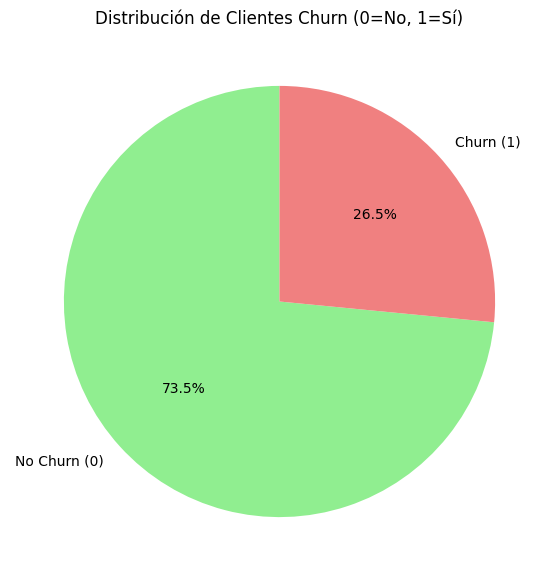

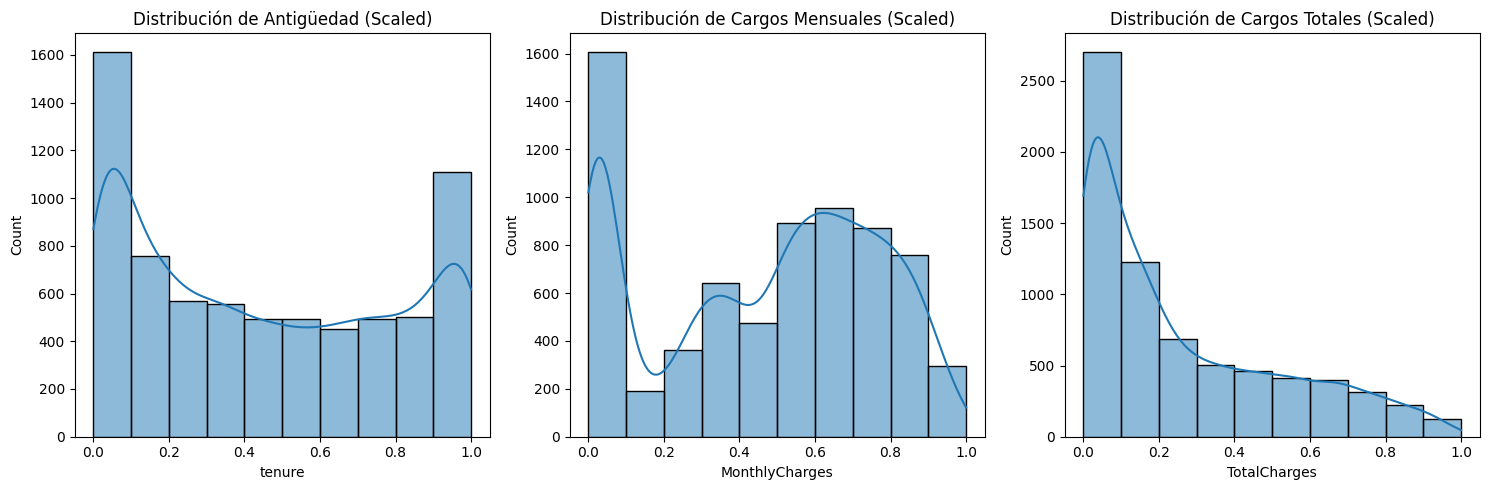

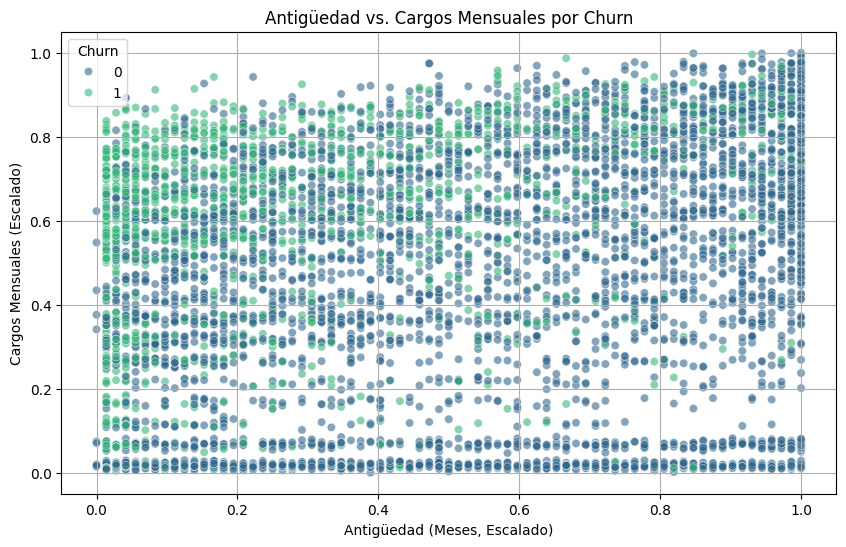

In [6]:
# Este bloque de código genera visualizaciones para analizar el comportamiento del dataset después
# del preprocesamiento. Primero, se crea una gráfica de pastel que muestra la distribución de la
# variable objetivo 'Churn', permitiendo observar qué proporción de clientes permanece (0) y cuál
# abandona el servicio (1). Luego, se grafican histogramas con KDE de tres variables numéricas
# escaladas ('tenure', 'MonthlyCharges' y 'TotalCharges') para entender sus distribuciones y detectar
# patrones, concentraciones o sesgos después del escalado. Finalmente, se construye un gráfico de
# dispersión que relaciona la antigüedad del cliente con sus cargos mensuales, coloreado según el
# estado de Churn, lo que permite visualizar posibles tendencias o diferencias entre clientes que
# se van y los que permanecen. Estas visualizaciones ayudan a comprender mejor la estructura del
# dataset y a identificar relaciones relevantes antes de entrenar los modelos de Machine Learning.


# Visualizar la distribución de la variable objetivo 'Churn'
plt.figure(figsize=(7, 7))
df_processed['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'], labels=['No Churn (0)', 'Churn (1)'])
plt.title('Distribución de Clientes Churn (0=No, 1=Sí)')
plt.ylabel('')
plt.show()

# Visualizar la distribución de algunas variables numéricas después del escalado
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df_processed['tenure'], bins=10, kde=True)
plt.title('Distribución de Antigüedad (Scaled)')
plt.subplot(1, 3, 2)
sns.histplot(df_processed['MonthlyCharges'], bins=10, kde=True)
plt.title('Distribución de Cargos Mensuales (Scaled)')
plt.subplot(1, 3, 3)
sns.histplot(df_processed['TotalCharges'], bins=10, kde=True)
plt.title('Distribución de Cargos Totales (Scaled)')
plt.tight_layout()
plt.show()

# Crear un gráfico de dispersión de antigüedad vs. cargos mensuales por estado de Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df_processed, palette='viridis', alpha=0.6)
plt.title('Antigüedad vs. Cargos Mensuales por Churn')
plt.xlabel('Antigüedad (Meses, Escalado)')
plt.ylabel('Cargos Mensuales (Escalado)')
plt.grid(True)
plt.show()


**Pregunta de Reflexión 4**:
¿Qué observas sobre la distribución de la variable  (la proporción de clientes que abandonan)? ¿Qué información te da el gráfico de dispersión de  antigüedad vs cargos mensuales sobre los clientes que sí abandonan?


**Respuesta**:
- La distribución de la variable Churn muestra un fuerte desbalance en el dataset: aproximadamente el 73.5% de los clientes no abandonan, mientras que solo el 26.5% sí lo hace. Esto indica que la mayoría de los registros corresponden a clientes que permanecen con el servicio, lo cual es común en problemas de churn reales, pero también implica que los modelos de Machine Learning deben manejar con cuidado este desbalance para evitar sesgos hacia la clase mayoritaria. Este desequilibrio es importante porque puede afectar métricas como la exactitud, haciendo que parezca que un modelo funciona bien cuando en realidad está ignorando la clase minoritaria.

- El gráfico de dispersión de antigüedad versus cargos mensuales revela que los clientes que abandonan tienden a concentrarse en zonas específicas: muchos de ellos tienen poca antigüedad (valores cercanos a 0) y, en varios casos, presentan cargos mensuales altos, lo cual sugiere que clientes nuevos con facturación elevada podrían ser más propensos a cancelar el servicio. Aunque también hay churn distribuido en otros rangos, la visualización indica que el abandono no es totalmente aleatorio y que existen patrones relacionados con el tiempo que el cliente lleva con la empresa y el nivel de sus pagos mensuales. Estas relaciones pueden ser útiles más adelante para la construcción de modelos predictivos.




##Parte B: Modelado y Comparación de Clasificación


###Paso 6: Preparación para los Modelos de Clasificación
Definiremos las variables independientes (X) y la variable dependiente (y) y dividiremos el dataset en conjuntos de entrenamiento y prueba.

In [7]:
# En este bloque se separan las variables independientes (X) y la variable objetivo (y).
# X contiene todas las columnas del dataset procesado excepto 'Churn', mientras que y almacena
# únicamente la variable 'Churn', que es lo que queremos predecir. Luego, los datos se dividen
# en un conjunto de entrenamiento (70%) y uno de prueba (30%) utilizando train_test_split.
# Esta separación es fundamental para evaluar el rendimiento real de los modelos, ya que permite
# entrenarlos con una parte de los datos y validarlos con información que no han visto antes.
# El parámetro random_state asegura reproducibilidad en la partición. Finalmente, se imprimen
# las dimensiones de cada subconjunto para confirmar que la división se realizó correctamente.


# Definir las variables independientes (X) y la variable dependiente (y)
X = df_processed.drop(columns=['Churn']) # Todas las columnas excepto la variable objetivo
y = df_processed['Churn'] # La variable objetivo 'Churn'

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usaremos el 70% para entrenamiento y el 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) # random_state para reproducibilidad

print(f"\nTamaño del conjunto de entrenamiento X: {X_train.shape}")
print(f"Tamaño del conjunto de prueba X: {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento y: {y_train.shape}")
print(f"Tamaño del conjunto de prueba y: {y_test.shape}")


Tamaño del conjunto de entrenamiento X: (4930, 30)
Tamaño del conjunto de prueba X: (2113, 30)
Tamaño del conjunto de entrenamiento y: (4930,)
Tamaño del conjunto de prueba y: (2113,)


###Paso 7: Implementación y Evaluación del Modelo de Árbol de Decisión
Los Árboles de Decisión son modelos supervisados ampliamente utilizados que pueden resolver problemas de clasificación. Son relativamente simples de entender y visualizar.


--- Modelado con Árbol de Decisión ---
Modelo de Árbol de Decisión entrenado.

Accuracy (Árbol de Decisión) en el conjunto de prueba: 0.7293
Precision (Árbol de Decisión) en el conjunto de prueba: 0.4818
Recall (Árbol de Decisión) en el conjunto de prueba: 0.5291
F1-Score (Árbol de Decisión) en el conjunto de prueba: 0.5043

Matriz de Confusión (Árbol de Decisión):
[[1250  313]
 [ 259  291]]


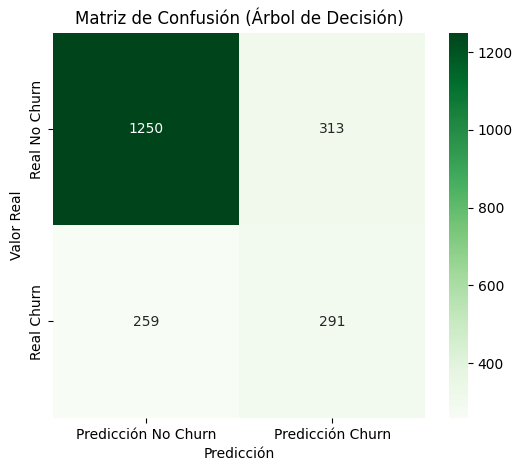

In [8]:
# En este bloque se entrena y evalúa un modelo de Árbol de Decisión. Primero, se crea una instancia
# del modelo con un random_state para asegurar reproducibilidad y luego se entrena utilizando los
# datos de entrenamiento (X_train, y_train). Después, el modelo genera predicciones sobre el conjunto
# de prueba X_test, y se calculan métricas clave de desempeño: accuracy, precision, recall y F1-score,
# que permiten evaluar qué tan bien el modelo identifica correctamente clientes que abandonan y los
# que no. También se genera la matriz de confusión, que muestra de forma explícita cuántos clientes
# fueron clasificados correctamente o incorrectamente en cada categoría. Finalmente, esta matriz se
# visualiza con un mapa de calor para facilitar su interpretación, permitiendo identificar patrones
# de aciertos y errores del modelo de Árbol de Decisión.


print("\n--- Modelado con Árbol de Decisión ---")

# Crear una instancia del modelo de Árbol de Decisión
model_dt = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model_dt.fit(X_train, y_train)

print("Modelo de Árbol de Decisión entrenado.")

# Realizar predicciones sobre el conjunto de prueba
y_pred_dt = model_dt.predict(X_test)

# Calcular métricas de evaluación para Árbol de Decisión
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"\nAccuracy (Árbol de Decisión) en el conjunto de prueba: {accuracy_dt:.4f}")
print(f"Precision (Árbol de Decisión) en el conjunto de prueba: {precision_dt:.4f}")
print(f"Recall (Árbol de Decisión) en el conjunto de prueba: {recall_dt:.4f}")
print(f"F1-Score (Árbol de Decisión) en el conjunto de prueba: {f1_dt:.4f}")

print("\nMatriz de Confusión (Árbol de Decisión):")
print(conf_matrix_dt)

# Visualizar la matriz de confusión de Árbol de Decisión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicción No Churn', 'Predicción Churn'],
            yticklabels=['Real No Churn', 'Real Churn'])
plt.title('Matriz de Confusión (Árbol de Decisión)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

###Paso 8: Implementación y Evaluación del Modelo Random Forest

Random Forest es un método de combinación (ensemble method) que utiliza múltiples árboles de decisión entrenados de forma independiente para mejorar la capacidad predictiva y de generalización. Es muy utilizado en la industria financiera.


--- Modelado con Random Forest ---
Modelo Random Forest entrenado.

Accuracy (Random Forest) en el conjunto de prueba: 0.7875
Precision (Random Forest) en el conjunto de prueba: 0.6120
Recall (Random Forest) en el conjunto de prueba: 0.5018
F1-Score (Random Forest) en el conjunto de prueba: 0.5514

Matriz de Confusión (Random Forest):
[[1388  175]
 [ 274  276]]


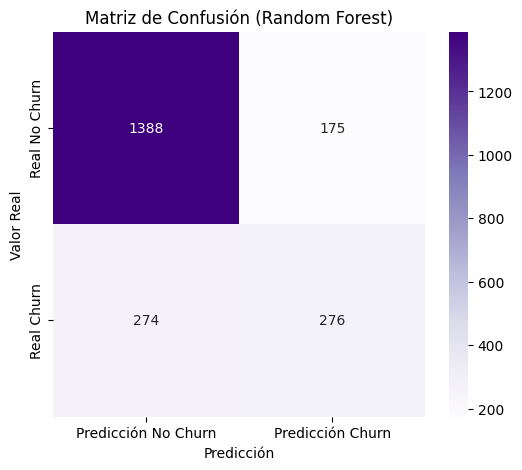

In [9]:
# En este bloque se entrena y evalúa un modelo de Random Forest. Primero se crea una instancia del
# modelo usando 100 árboles (n_estimators=100), un random_state para asegurar reproducibilidad y n_jobs=-1
# para utilizar todos los núcleos del procesador. Luego, el modelo se entrena con los datos de
# entrenamiento (X_train, y_train) y se generan predicciones sobre el conjunto de prueba X_test.
# A continuación, se calculan métricas de rendimiento como accuracy, precision, recall y F1-score,
# que permiten evaluar qué tan bien el modelo identifica clientes que abandonan y clientes que no lo hacen.
# También se obtiene la matriz de confusión, que muestra detalladamente los aciertos y errores en
# cada clase. Finalmente, esta matriz se visualiza mediante un mapa de calor, facilitando la interpretación
# del desempeño del modelo Random Forest y permitiendo compararlo con otros modelos como el Árbol de Decisión.


print("\n--- Modelado con Random Forest ---")

# Crear una instancia del modelo Random Forest
# Usamos un número razonable de estimadores (árboles) para empezar, por ejemplo, 100.
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo con los datos de entrenamiento
model_rf.fit(X_train, y_train)

print("Modelo Random Forest entrenado.")

# Realizar predicciones sobre el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Calcular métricas de evaluación para Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nAccuracy (Random Forest) en el conjunto de prueba: {accuracy_rf:.4f}")
print(f"Precision (Random Forest) en el conjunto de prueba: {precision_rf:.4f}")
print(f"Recall (Random Forest) en el conjunto de prueba: {recall_rf:.4f}")
print(f"F1-Score (Random Forest) en el conjunto de prueba: {f1_rf:.4f}")

print("\nMatriz de Confusión (Random Forest):")
print(conf_matrix_rf)

# Visualizar la matriz de confusión de Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicción No Churn', 'Predicción Churn'],
            yticklabels=['Real No Churn', 'Real Churn'])
plt.title('Matriz de Confusión (Random Forest)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

###Paso 9: Implementación y Evaluación de un Modelo de Red Neuronal (Perceptrón Multicapa)

Las Redes Neuronales, inspiradas en la estructura del cerebro, son modelos no lineales que pueden capturar relaciones complejas en los datos. Utilizaremos un Perceptrón Multicapa (MLP) de  como introducción, ya que es una implementación de "alto nivel" adecuada para principiantes.


--- Modelado con red neuronal (MLPClassifier) ---
Modelo de Red Neuronal (MLPClassifier) entrenado.

Accuracy (MLPClassifier) en el conjunto de prueba: 0.7615
Precision (MLPClassifier) en el conjunto de prueba: 0.5404
Recall (MLPClassifier) en el conjunto de prueba: 0.5600
F1-Score (MLPClassifier) en el conjunto de prueba: 0.5500

Matriz de Confusión (MLPClassifier):
[[1301  262]
 [ 242  308]]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


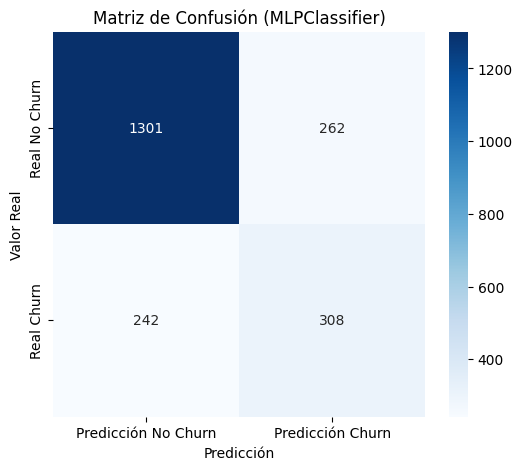

In [10]:
# En este bloque se entrena y evalúa un modelo de red neuronal utilizando MLPClassifier, que implementa
# un perceptrón multicapa. Primero se crea la instancia del modelo especificando una arquitectura con
# una capa oculta de 100 neuronas (hidden_layer_sizes=(100,)), la función de activación ReLU, el
# optimizador 'adam', un máximo de 500 iteraciones y un random_state para reproducibilidad. Luego, el
# modelo se entrena con los datos de entrenamiento (X_train, y_train) y se generan predicciones sobre
# el conjunto de prueba X_test. A continuación se calculan las métricas de desempeño (accuracy,
# precision, recall y F1-score), que permiten evaluar qué tan bien la red neuronal clasifica a los
# clientes que abandonan y a los que permanecen. También se calcula la matriz de confusión para
# analizar detalladamente los aciertos y errores del modelo. Finalmente, esta matriz se visualiza con
# un mapa de calor. El aviso de "ConvergenceWarning" indica que la red alcanzó el máximo número de
# iteraciones sin converger completamente, lo cual puede mejorarse ajustando parámetros como
# max_iter, learning rate o la arquitectura de la red.


print("\n--- Modelado con red neuronal (MLPClassifier) ---")

# Crear una instancia del modelo MLPClassifier (Perceptrón Multicapa)
# Los parámetros como hidden_layer_sizes, max_iter, activation pueden ajustarse.
# random_state para reproducibilidad
# solver='adam' es un optimizador común, alpha para regularización
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model_mlp.fit(X_train, y_train)

print("Modelo de Red Neuronal (MLPClassifier) entrenado.")

# Realizar predicciones sobre el conjunto de prueba
y_pred_mlp = model_mlp.predict(X_test)

# Calcular métricas de evaluación para MLPClassifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

print(f"\nAccuracy (MLPClassifier) en el conjunto de prueba: {accuracy_mlp:.4f}")
print(f"Precision (MLPClassifier) en el conjunto de prueba: {precision_mlp:.4f}")
print(f"Recall (MLPClassifier) en el conjunto de prueba: {recall_mlp:.4f}")
print(f"F1-Score (MLPClassifier) en el conjunto de prueba: {f1_mlp:.4f}")

print("\nMatriz de Confusión (MLPClassifier):")
print(conf_matrix_mlp)

# Visualizar la matriz de confusión de MLPClassifier
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción No Churn', 'Predicción Churn'],
            yticklabels=['Real No Churn', 'Real Churn'])
plt.title('Matriz de Confusión (MLPClassifier)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


###Paso 10: Comparación de Modelos de Clasificación

Finalmente, resumiremos y compararemos el rendimiento de los tres modelos implementados.


In [11]:
# Este bloque compara el rendimiento de los tres modelos entrenados (Árbol de Decisión, Random Forest
# y Red Neuronal MLP) mostrando sus métricas principales: accuracy, precision, recall y F1-score.
# Estas métricas permiten evaluar qué tan bien clasifica cada modelo y facilitan identificar cuál
# ofrece un mejor equilibrio entre aciertos globales, capacidad de detectar clientes que abandonan
# (recall) y precisión al predecir churn. Además, se construye un DataFrame que organiza estas métricas
# en una tabla comparativa, lo que proporciona una visualización más clara y estructurada del
# desempeño relativo de cada modelo. Esta comparación final ayuda a decidir qué modelo es más adecuado
# para el problema de predicción de churn en este dataset.


print("\n--- Comparación de modelos de clasificación ---")
print(f"Árbol de Decisión - Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1-Score: {f1_dt:.4f}")
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-Score: {f1_rf:.4f}")
print(f"Red Neuronal (MLP) - Accuracy: {accuracy_mlp:.4f}, Precision: {precision_mlp:.4f}, Recall: {recall_mlp:.4f}, F1-Score: {f1_mlp:.4f}")

# Opcional: Crear un DataFrame para una comparación más visual
comparison_df = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'Random Forest', 'Red Neuronal (MLP)'],
    'Accuracy': [accuracy_dt, accuracy_rf, accuracy_mlp],
    'Precision': [precision_dt, precision_rf, precision_mlp],
    'Recall': [recall_dt, recall_rf, recall_mlp],
    'F1-Score': [f1_dt, f1_rf, f1_mlp]
})
print("\nTabla de comparación de métricas:")
print(comparison_df.set_index('Modelo'))



--- Comparación de modelos de clasificación ---
Árbol de Decisión - Accuracy: 0.7293, Precision: 0.4818, Recall: 0.5291, F1-Score: 0.5043
Random Forest - Accuracy: 0.7875, Precision: 0.6120, Recall: 0.5018, F1-Score: 0.5514
Red Neuronal (MLP) - Accuracy: 0.7615, Precision: 0.5404, Recall: 0.5600, F1-Score: 0.5500

Tabla de comparación de métricas:
                    Accuracy  Precision    Recall  F1-Score
Modelo                                                     
Árbol de Decisión   0.729295   0.481788  0.529091  0.504333
Random Forest       0.787506   0.611973  0.501818  0.551449
Red Neuronal (MLP)  0.761477   0.540351  0.560000  0.550000


**Pregunta de Reflexión 5**:
Compara el rendimiento del Árbol de Decisión, Random Forest y la Red Neuronal (MLPClassifier) utilizando las métricas de acurracy, precision, recall  y F1-score. ¿Cuál de los tres modelos consideras que ofrece un mejor equilibrio para predecir la retención de clientes en este conjunto de datos y por qué? ¿Existen escenarios donde un modelo más simple (como el Árbol de Decisión individual) podría ser preferible a uno más complejo (como Random Forest o MLP)?



**Respuesta**:
- El modelo que ofrece el mejor equilibrio general entre las métricas es Random Forest, ya que obtiene la mayor accuracy (0.7875) y también la mayor precisión (0.6120), lo que indica que comete menos falsos positivos cuando predice que un cliente abandonará. Aunque su recall (0.5018) no es el más alto, mantiene un buen balance entre detectar clientes que realmente abandonan y evitar clasificaciones incorrectas. La red neuronal (MLP) obtiene el mayor recall (0.5600), lo que significa que identifica más casos reales de churn, pero su precisión es menor que la de Random Forest; y el árbol de decisión individual tiene la métrica global más baja. Por tanto, **Random Forest** ofrece la mejor combinación de estabilidad, capacidad predictiva y control del sobreajuste para este tipo de datos.

- Sí, existen escenarios donde un modelo más simple como un Árbol de Decisión individual sería preferible. Los árboles son fáciles de interpretar, permiten visualizar reglas claras y explicables, y requieren menos recursos computacionales, lo que es útil en sistemas con poca capacidad o cuando la interpretabilidad es crucial (por ejemplo, para justificar decisiones ante un equipo directivo o cumplir regulaciones). En cambio, Random Forest y MLPClassifier, aunque más precisos, son modelos más complejos, menos transparentes y más costosos de entrenar. Por ello, si la prioridad es explicabilidad, rapidez de ejecución o facilidad de implementación, un árbol de decisión individual puede ser una mejor opción.


<hr/>
<footer style="text-align:center; font-size:12px; color:gray;">
© 2025 Universidad Tecmilenio – Todos los derechos reservados

</footer>